# **Q.1 Support Vector Machine:**

- Implement SVM to classify the type of iris flower based on its sepal length and width using the iris dataset? 

- Also try to use the scikit-learn digits dataset and an SVM to classify handwritten digits? 

- For both datasets, provide a step-by-step code, including:  

**1.** Loading the dataset.

**2.** Visualizing the data.

**3.** Splitting the data into training and testing sets.

**4.** Initializing and training the SVM model.

**5.** Testing the model. 

# **Irish-Data set**

# Step 1: Loading the dataset

In [1]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:, :2]  # Using only the first two features (sepal length and width)
y = iris.target

# Step 2: Visualizing the data

In [2]:
# Print the first 5 rows of the data along with their labels
for i in range(5):
    print("Row", i+1, ":", X[i], "Label:", y[i])


Row 1 : [5.1 3.5] Label: 0
Row 2 : [4.9 3. ] Label: 0
Row 3 : [4.7 3.2] Label: 0
Row 4 : [4.6 3.1] Label: 0
Row 5 : [5.  3.6] Label: 0


Text(0.5, 1.0, 'Iris Dataset - Sepal Width vs Length')

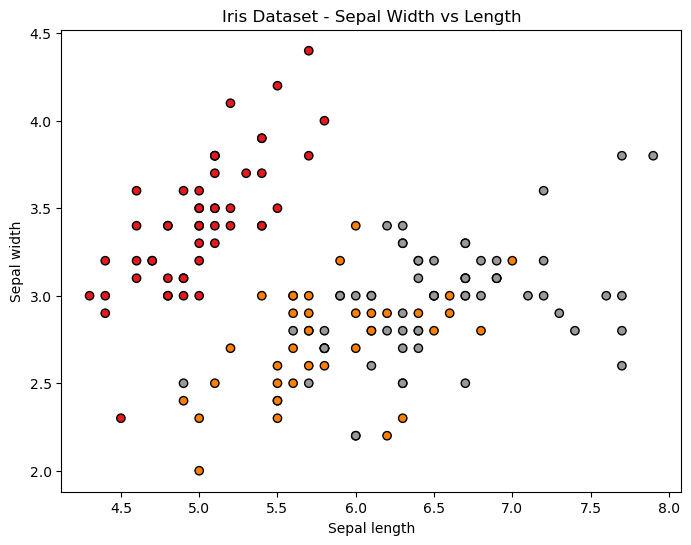

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Iris Dataset - Sepal Width vs Length')


# Step 3: Splitting the data into training and testing sets


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Step 4: Initializing and training the SVM model


In [5]:
from sklearn.svm import SVC

svm_model = SVC(kernel='linear', C=1.0)  # Using linear kernel
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

# Step 5: Testing the model

In [6]:

from sklearn.metrics import accuracy_score, classification_report

y_pred = svm_model.predict(X_test)

# Print the predicted values
print("Predicted values:", y_pred)

# Print the actual test values
print("Actual test values:\n", y_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n")
print(classification_report(y_test, y_pred))


Predicted values: [1 0 2 1 2 0 1 2 1 1 2 0 0 0 0 2 2 1 1 2 0 1 0 2 2 2 2 2 0 0]
Actual test values:
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
Accuracy: 0.9
Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.88      0.78      0.82         9
           2       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



# Plot the decision boundary

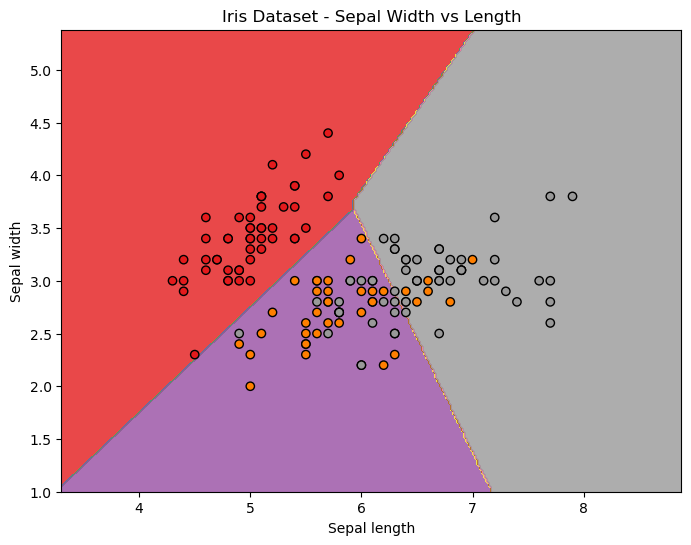

In [7]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 6))

# Create grid to evaluate model
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Calculate decision function for each point on the grid
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary and margins
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Set1)

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Iris Dataset - Sepal Width vs Length')

plt.show()


# **Digit Data set**

In [8]:
import matplotlib.pyplot as plt
from sklearn import datasets, metrics, svm
from sklearn.model_selection import train_test_split


# Step 1: Loading the dataset

In [9]:
digits = datasets.load_digits()

# Step 2: Visualizing the data

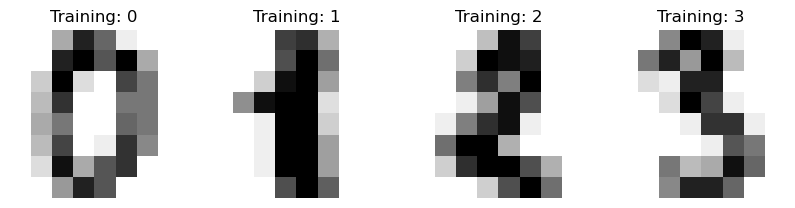

In [10]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)


# Step 3: Splitting the data into training and testing sets

In [11]:
# Flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.2, shuffle=False
)

# Step 4: Initializing and training the SVM model

In [12]:
# Create a support vector classifier
clf = svm.SVC(gamma=0.001)

# Learn the digits on the train subset
clf.fit(X_train, y_train)


SVC(gamma=0.001)

# Step 5: Testing the model

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        35
           1       0.97      1.00      0.99        36
           2       1.00      1.00      1.00        35
           3       0.97      0.81      0.88        37
           4       0.97      0.92      0.94        37
           5       0.93      1.00      0.96        37
           6       1.00      1.00      1.00        37
           7       0.97      1.00      0.99        36
           8       0.84      0.94      0.89        33
           9       0.95      0.95      0.95        37

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360




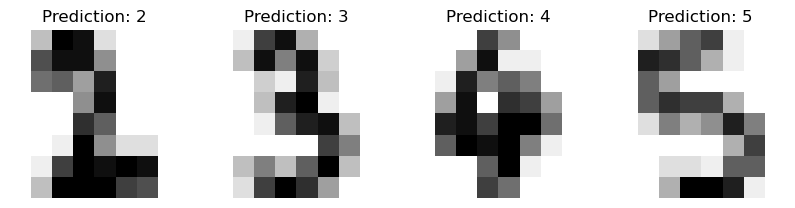

In [13]:
# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

# Visualize the predictions
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

# Print classification report
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

In [14]:
# Step 5: Testing the model
from sklearn.metrics import accuracy_score

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

# Print the testing data
print("Testing data:")
print(X_test)

# Print the predicted data
print("Predicted data:")
print(predicted)

# Calculate accuracy
accuracy = accuracy_score(y_test, predicted)

# Print the accuracy
print("Accuracy:", accuracy)


Testing data:
[[ 0.  4. 16. ... 12. 11.  0.]
 [ 0.  1. 12. ...  6.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
Predicted data:
[2 3 4 5 6 7 8 9 0 9 5 5 6 5 0 9 8 9 8 4 1 7 7 3 5 1 0 0 2 2 7 9 2 0 1 2 6
 3 3 7 3 3 4 6 6 6 4 9 1 5 0 9 5 2 8 2 0 0 1 7 6 3 2 1 7 4 6 3 1 3 9 1 7 6
 8 4 3 1 4 0 5 3 6 9 6 1 7 5 4 4 7 2 8 2 2 5 7 9 5 4 8 8 4 9 0 8 9 8 0 1 2
 3 4 5 6 7 1 9 0 1 2 3 4 5 6 9 0 1 2 3 4 5 6 7 8 9 4 9 5 5 6 5 0 9 8 9 8 4
 1 7 7 3 5 1 0 0 2 2 7 8 2 0 1 2 6 8 3 7 7 3 4 6 6 6 9 9 1 5 0 9 5 2 8 0 1
 7 6 3 2 1 7 8 6 3 1 3 9 1 7 6 8 4 3 1 4 0 5 3 6 9 6 1 7 5 4 4 7 2 2 5 7 3
 5 8 4 5 0 8 9 8 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 8 4 5 6 7 8
 9 0 9 5 5 6 5 0 9 8 9 8 4 1 7 7 3 5 1 0 0 2 2 7 8 2 0 1 2 6 8 8 7 5 3 4 6
 6 6 4 9 1 5 0 9 5 2 8 2 0 0 1 7 6 3 2 1 7 4 6 3 1 3 9 1 7 6 8 4 5 1 4 0 5
 3 6 9 6 1 7 5 4 4 7 2 8 2 2 5 7 9 5 4 8 8 4 9 0 8 9 8]
Accuracy: 0.9583333333333334


# Q. 2 Principal Component Analysis:

- To do PCA, use the Eigen decomposition available in numpy. The dataset can be obtained from 

https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_3d.html#sphx-glr-auto-examples-decomposition-plot-pca-3d-py. 

- DO NOT USE the code available for PCA in the same link (as mentioned above, use numpy's Eigen decomposition). 

- Compare your results with the one available in the link (here, you are free to use the code available in the link to generate any numbers for comparison). 

- Are you getting the same result?

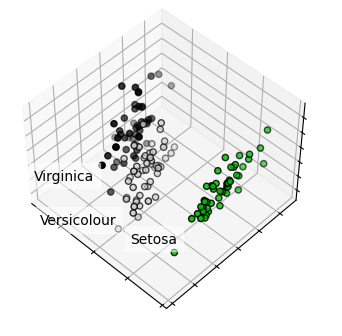

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Load the iris dataset
from sklearn import datasets
np.random.seed(5)
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Step 1: Compute the covariance matrix
cov_matrix = np.cov(X.T)

# Step 2: Perform Eigen decomposition
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Step 3: Sort Eigenvalues and Eigenvectors
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Step 4: Choose the top k Eigenvectors (k=3 for 3D projection)
k = 3
projection_matrix = eigenvectors[:, :k]

# Step 5: Project the original data onto the new subspace
X_pca = X.dot(projection_matrix)

# Plotting
fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = fig.add_subplot(111, projection="3d", elev=48, azim=134)
ax.set_position([0, 0, 0.95, 1])

plt.cla()

for name, label in [("Setosa", 0), ("Versicolour", 1), ("Virginica", 2)]:
    ax.text3D(
        X_pca[y == label, 0].mean(),
        X_pca[y == label, 1].mean() + 1.5,
        X_pca[y == label, 2].mean(),
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.5, edgecolor="w", facecolor="w"),
    )

# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(float)
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y, cmap=plt.cm.nipy_spectral, edgecolor="k")

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])

plt.show()

# Using the code provided in the link.

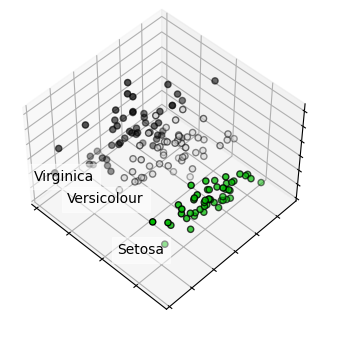

In [16]:
import matplotlib.pyplot as plt

# unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401
import numpy as np

from sklearn import datasets, decomposition

np.random.seed(5)

iris = datasets.load_iris()
X = iris.data
y = iris.target

fig = plt.figure(1, figsize=(4, 3))
plt.clf()

ax = fig.add_subplot(111, projection="3d", elev=48, azim=134)
ax.set_position([0, 0, 0.95, 1])


plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

for name, label in [("Setosa", 0), ("Versicolour", 1), ("Virginica", 2)]:
    ax.text3D(
        X[y == label, 0].mean(),
        X[y == label, 1].mean() + 1.5,
        X[y == label, 2].mean(),
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.5, edgecolor="w", facecolor="w"),
    )
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral, edgecolor="k")

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])

plt.show()

1. **First Code: Manual PCA Implementation**
   - This code manually implements Principal Component Analysis (PCA) for dimensionality reduction.
   - It computes the covariance matrix of the data, performs eigen decomposition, sorts the eigenvalues and corresponding eigenvectors, and then projects the data onto the subspace spanned by the top **k** eigenvectors.
   - The code then visualizes the projected data in a 3D plot.

2. **Second Code: PCA using Scikit-Learn**
   - This code performs PCA using the **PCA** class from the **sklearn.decomposition** module.
   
   - The code then visualizes the transformed data in a 3D plot, similar to the first code.


**Conclusion:**
  - Overall, both implementations produce similar results in terms of visualization. 

  - While both codes is used for the same goal, the second code is more efficient and straightforward due to the use of Scikit-Learn's PCA implementation and  they are optimized, tested, and often provide additional functionalities. 